## Library 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import re
from nltk.corpus import stopwords


In [6]:
df_train = pd.read_csv("twitter_training.csv")
df_test = pd.read_csv("twitter_validation.csv")

In [7]:
df_train.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [8]:
df_test.head(10)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [9]:
cols = ["#", "reference", "sentiment", "text"]
df_train.columns = cols
df_test.columns = cols

In [10]:
Target = "sentiment"

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          74681 non-null  int64 
 1   reference  74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


We can see that text column of training dataset has some null values.

In [12]:
df_train.isnull().sum()

#              0
reference      0
sentiment      0
text         686
dtype: int64

In [13]:
#total %age of null values 
print((100*686)/74681)

0.9185736666622032


As the %age of null values is less than 1% we can delete the records having null values

In [14]:
df_train.dropna(inplace=True, axis = 0)

## STATS ON TWEETS

In [15]:
texts = df_train["text"]
len_texts = [len(t.split()) for t in texts.values]
mean_len_texts = np.mean(len_texts)
mean_len_texts

19.22673153591459

Average Length of tweets in training dataset is 20 words.

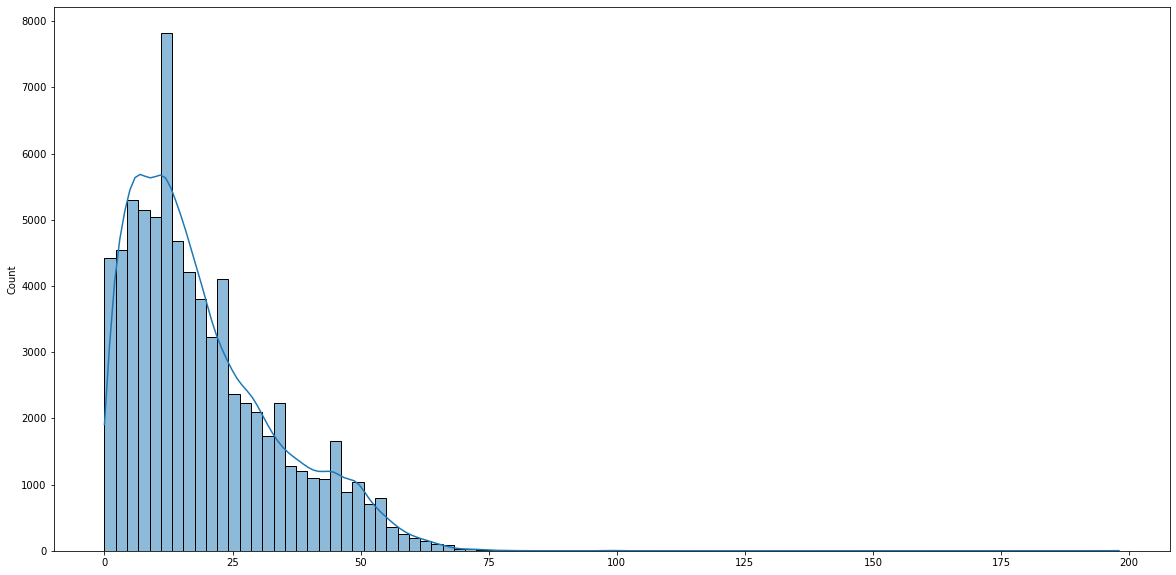

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(len_texts, bins=90,kde=True)
plt.show()

Distribution of length of text is positively skewwed and some outliers can also be viewed above 100 words.

In [17]:
outliers = df_train['text'][np.array(len_texts)>100]
for inx in outliers.index:
    print('Target', df_train["sentiment"][inx])
    print(outliers[inx],'\n')

Target Neutral
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Target Positive
I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEE E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E 

Target Positive
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Some of the text marked as outliers due there length only have irrelevant or repeated symbols increasing there length.

Check for data imbalance

In [18]:
df_train.sentiment.value_counts()

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64

Count of all target categories is equal so no resampling is required.

In [19]:
stp_list = stopwords.words('english') #list of stop words in english 

count = {'Positive':[],
         'Neutral':[],
         'Irrelevant':[],
         'Negative':[]}

pattern = re.compile('[^\w ]') # this is regex to split string of words into a list of words

for tweet, s in zip(df_train['text'],df_train['sentiment']):
    tweet = re.sub(pattern,'',tweet).lower().split()
    tweet = [word for word in tweet if word not in stp_list]
    count[s].extend(tweet)

In [20]:

for target, words in count.items():
    top_word_list = pd.Series(words).value_counts()[:10]
    print("Top",target,"words\n")
    print(top_word_list,"\n")

Top Positive words

game      2272
love      1777
im        1769
good      1614
like      1359
really    1290
2         1280
new       1199
best      1112
one       1058
dtype: int64 

Top Neutral words

johnson    1766
2          1337
game       1227
amazon     1118
_          1080
like        909
im          891
get         886
one         855
new         850
dtype: int64 

Top Irrelevant words

like      992
see       943
player    878
im        856
game      793
people    764
ban       739
love      670
good      663
one       663
dtype: int64 

Top Negative words

game    3766
get     1662
like    1620
shit    1516
im      1425
fix     1313
fuck    1259
cant    1226
play    1209
dont    1127
dtype: int64 



In [21]:
# emoticons
from emoji import UNICODE_EMOJI
import emoji
import regex as re

def split_count(text):
    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

target_emojis = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}

pattern = re.compile('\u200d')
for i, text in enumerate(texts):
    emoji_count = split_count(text)
    if emoji_count:
        emoji_count = [re.sub(pattern, '', e) for e in emoji_count]
        target_emojis[df_train["sentiment"].iloc[i]].extend(emoji_count)

for t, emojis in target_emojis.items():
    bar_info = pd.Series(emojis).value_counts()[:15]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    

Top emojis for Positive 
 ['🤣', '🥰', '🥺', '🤦', '🤔', '🤩', '🥳', '™', '🤯', '🤷', '🦁', '‼', '🤖', '🥴', '🤤']
Top emojis for Neutral 
 ['🤣', '🤔', '🤦', '🥺', '™', '🤷', '©', '🤩', '🥰', '‼', '🤯', '🥳', '🤠', '🤡', '🤨']
Top emojis for Irrelevant 
 ['🤣', '🥺', '🥰', '🤦', '🤷', '🤔', '🥳', '🤗', '🥴', '🤪', '🧘', '🤧', '🦋', '🤓', '🤬']
Top emojis for Negative 
 ['🤦', '🤣', '🥺', '🤬', '🥴', '🤷', '🤔', '™', '🧢', '🤡', '🤢', '🤩', '🤑', '‼', '🤪']


## Preprocessing

In [22]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
import emoji
import spacy
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.exceptions import NotFittedError

import re

import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

In [23]:
class Preprocessor:
    def __init__(self, stopwords=stopwords):
        self.vectorizer = TfidfVectorizer(lowercase=False, max_features=8000,
                                         min_df=10, ngram_range=(1, 3),
                                         tokenizer=None)
        self.stopwords = stopwords
        self.vectorizer_fitted = False
        
    def remove_urls(self, texts):
        print('Removing URLs...')
        pattern = re.compile('(\w+\.com ?/ ?.+)|(http\S+)')
        return [re.sub(pattern, '', text) for text in texts]
    
    def remove_double_space(self, texts):
        print('Removing double space...')
        pattern = re.compile(' +')
        return [re.sub(pattern, ' ', text) for text in texts]
        
    def remove_punctuation(self, texts):
        print('Removing Punctuation...')
        pattern = re.compile('[^a-z ]')
        return [re.sub(pattern, ' ', text) for text in texts]
    
    def remove_stopwords(self, texts):
        print('Removing stopwords...')
        return [[w for w in text.split(' ') if w not in self.stopwords] for text in tqdm(texts)]
    
    def remove_numbers(self, texts):
        print('Removing numbers...')
        return [' '.join([w for w in text if not w.isdigit()]) for text in tqdm(texts)]
    
    def decode_emojis(self, texts):
        print('Decoding emojis...')
        return [emoji.demojize(text, language='en') for text in texts] 
    
    def lemmatize(self, texts):
        print('Lemmatizing...')
        lemmatized_texts = []
        for text in tqdm(texts):
            doc = nlp(text)
            lemmatized_texts.append(' '.join([token.lemma_ for token in doc]))
                                    
        return lemmatized_texts
        
    def transform(self, X, y=None, mode='train'):
        X = X.copy()
        print('Removing Nans...')
        X = X[~X.isnull()]                          # delete nans
        X = X[~X.duplicated()]                      # delete duplicates
        
        if mode == 'train':
            self.train_idx = X.index
        else:
            self.test_idx = X.index
        print('Counting capitalized...')
        capitalized = [np.sum([t.isupper() for t in text.split()]) 
                           for text in np.array(X.values)]  # count capitalized
        # X['cap'] = capitalized
        print('Lowering...')
        X = [text.lower() for text in X]             # lower
        X = self.remove_urls(X)                      # remove urls
        X = self.remove_punctuation(X)               # remove punctuation
        X = self.remove_double_space(X)              # remove double space
        X = self.decode_emojis(X)                    # decode emojis
        X = self.remove_stopwords(X)                 # remove stopwords
        X = self.remove_numbers(X)                   # remove numbers                      
        X = self.lemmatize(X)                        # lemmatize
        
        if not self.vectorizer_fitted:
            self.vectorizer_fitted = True
            print('Fitting vectorizer...')
            self.vectorizer.fit(X)

        print('Vectorizing...')
        X = self.vectorizer.transform(X)             # vectorize
        
        return X

In [24]:
pr = Preprocessor()
y_train = df_train['sentiment']
y_test = df_test['sentiment']

df_train_pr = pr.transform(df_train['text'])
df_train_pr = pd.DataFrame.sparse.from_spmatrix(df_train_pr, columns=pr.vectorizer.get_feature_names())

ohe = OneHotEncoder()
referring_ohe = ohe.fit_transform(df_train['reference'][df_train.index.isin(pr.train_idx)].to_numpy().reshape(-1, 1))
referring_ohe = pd.DataFrame.sparse.from_spmatrix(referring_ohe, columns=ohe.get_feature_names())

X_train = pd.concat([df_train_pr, referring_ohe], axis=1)
y_train = y_train[y_train.index.isin(pr.train_idx)]
y_train.index = X_train.index

Removing Nans...
Counting capitalized...
Lowering...
Removing URLs...
Removing Punctuation...
Removing double space...
Decoding emojis...
Removing stopwords...


100%|██████████| 69490/69490 [00:00<00:00, 169116.62it/s]


Removing numbers...


100%|██████████| 69490/69490 [00:00<00:00, 391430.90it/s]


Lemmatizing...


100%|██████████| 69490/69490 [11:24<00:00, 101.50it/s]


Fitting vectorizer...
Vectorizing...
  (0, 3787)	0.5002575827746358
  (0, 1178)	0.4337609348134879
  (0, 735)	0.749395624691129
  (1, 3787)	0.6619881601410632
  (1, 2782)	0.4241936332410107
  (1, 736)	0.617925106587231
  (2, 4576)	0.753825312671329
  (2, 1178)	0.44719346034398366
  (2, 736)	0.4814201979576126
  (3, 4576)	0.790554367073284
  (3, 2782)	0.34658809212517444
  (3, 736)	0.5048767048482143
  (4, 4576)	0.790554367073284
  (4, 2782)	0.34658809212517444
  (4, 736)	0.5048767048482143
  (5, 7505)	0.2829214513940095
  (5, 6559)	0.2525718991154358
  (5, 6558)	0.18619528780076355
  (5, 6500)	0.16372981435087805
  (5, 5222)	0.1200819176899859
  (5, 5126)	0.17081547811114656
  (5, 5007)	0.20627380046698018
  (5, 4934)	0.23797497446661034
  (5, 4927)	0.12297347706294098
  (5, 4361)	0.2744860169410724
  :	:
  (69487, 608)	0.3129496320291094
  (69488, 7923)	0.17577140352732007
  (69488, 7767)	0.3048413572646622
  (69488, 5767)	0.2672561678804314
  (69488, 4847)	0.3321332147530617
  (69488

In [25]:
df_test_pr = pr.transform(df_test['text'], mode='test')
df_test_pr = pd.DataFrame.sparse.from_spmatrix(df_test_pr, columns=pr.vectorizer.get_feature_names())

ohe = OneHotEncoder()
referring_ohe = ohe.fit_transform(df_train['reference'][df_train.index.isin(pr.train_idx)].to_numpy().reshape(-1, 1))
referring_ohe = ohe.transform(df_test['reference'][df_test.index.isin(pr.test_idx)].to_numpy().reshape(-1, 1))
referring_ohe = pd.DataFrame.sparse.from_spmatrix(referring_ohe, columns=ohe.get_feature_names())

X_test = pd.concat([df_test_pr, referring_ohe], axis=1)
y_test = y_test[y_test.index.isin(pr.test_idx)]
y_test.index = X_test.index

Removing Nans...
Counting capitalized...
Lowering...
Removing URLs...
Removing Punctuation...
Removing double space...
Decoding emojis...
Removing stopwords...


100%|██████████| 998/998 [00:00<00:00, 200292.62it/s]


Removing numbers...


100%|██████████| 998/998 [00:00<00:00, 333645.42it/s]


Lemmatizing...


100%|██████████| 998/998 [00:09<00:00, 103.97it/s]


Vectorizing...


In [26]:
X_train.shape

(69490, 8032)

In [27]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix

In [28]:
def train_cv(model, X_train, y_train, params, n_splits=5, scoring='f1_weighted'):
    kf = KFold(n_splits=n_splits, random_state=0, shuffle=True)

    cv = RandomizedSearchCV(model,
                        params,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=2,
                        random_state=1
                        )
    cv.fit(X_train, y_train)

    print('Best params', cv.best_params_)
    return cv

In [29]:
rs_parameters = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'C': uniform(scale=10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'l1_ratio': uniform(scale=10)
    }

In [31]:
lr = LogisticRegression()
model_cv_lr = train_cv(lr, X_train, y_train, rs_parameters)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.78345872        nan 0.78042286 0.78383133        nan 0.79216909
        nan        nan 0.74295489 0.75300155]
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.88087505        nan 0.86768752 0.87593788        nan 0.90106284
        nan        nan 0.81769245 0.82228678]
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


Best params {'C': 9.13962024579233, 'l1_ratio': 4.572048079869883, 'penalty': 'l1', 'solver': 'saga'}


c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [33]:
bestimator_lr = model_cv_lr.best_estimator_
print(classification_report(y_test, bestimator_lr.predict(X_test)))

              precision    recall  f1-score   support

  Irrelevant       0.89      0.89      0.89       171
    Negative       0.92      0.91      0.92       266
     Neutral       0.94      0.91      0.92       285
    Positive       0.88      0.92      0.90       276

    accuracy                           0.91       998
   macro avg       0.91      0.91      0.91       998
weighted avg       0.91      0.91      0.91       998



Accuracy of 91% is achieved